In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Main class to handle data loading and clustering
class TalentAnalyzer:
    def __init__(self, file_path):
        try:
            self.df = pd.read_csv(file_path)
            # Fix column names (remove hidden spaces)
            self.df.columns = self.df.columns.str.strip()
            print(f"Data loaded: {self.df.shape[0]} rows")
        except FileNotFoundError:
            print("Error: File not found")
            self.df = None

    def preprocess_data(self):
        if self.df is None: return None
        
        # Handle 'batter' vs 'batsman' issue
        col = 'batter' if 'batter' in self.df.columns else 'batsman'
        print(f"Grouping by: {col}")

        # Aggregate stats
        stats = self.df.groupby(col).agg({
            'batsman_runs': 'sum',
            'ball': 'count',
            'match_id': 'nunique'
        }).reset_index()
        
        # Filter for active players (>300 balls)
        self.player_stats = stats[stats['ball'] > 300].copy()
        
        # Standardize column name
        self.player_stats.rename(columns={col: 'batsman'}, inplace=True)
        return self.player_stats

    def feature_engineering(self):
        # Calculate consistency and strike rate
        self.player_stats['Avg_Runs'] = self.player_stats['batsman_runs'] / self.player_stats['match_id']
        self.player_stats['Strike_Rate'] = (self.player_stats['batsman_runs'] / self.player_stats['ball']) * 100

    def run_clustering(self, n_clusters=4):
        # Using KMeans to find groups
        X = self.player_stats[['Avg_Runs', 'Strike_Rate']]
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        self.player_stats['Cluster'] = kmeans.fit_predict(X)

    def visualize(self):
        plt.style.use('dark_background')
        plt.figure(figsize=(10, 6))
        
        plt.scatter(self.player_stats['Avg_Runs'], self.player_stats['Strike_Rate'], 
                   c=self.player_stats['Cluster'], cmap='rainbow', s=100, alpha=0.8)
        
        plt.title('Player Performance Clusters', fontsize=14, color='yellow')
        plt.xlabel('Avg Runs (Consistency)', fontsize=12)
        plt.ylabel('Strike Rate (Velocity)', fontsize=12)
        plt.grid(True, alpha=0.2)
        plt.show()

In [2]:
# Path to local file
file_path = r"C:\Users\Windows 10\Downloads\deliveries_2008-2024.csv"

# Init engine
engine = TalentAnalyzer(file_path)

Data loaded: 260920 rows


In [3]:
# checking columns before processing
print(engine.df.columns.tolist()[:5])
engine.df.head(3)

['match_id', 'inning', 'batting_team', 'bowling_team', 'over']


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NA,NA,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,,0,NA,NA,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NA,NA,NaN


Grouping by: batter


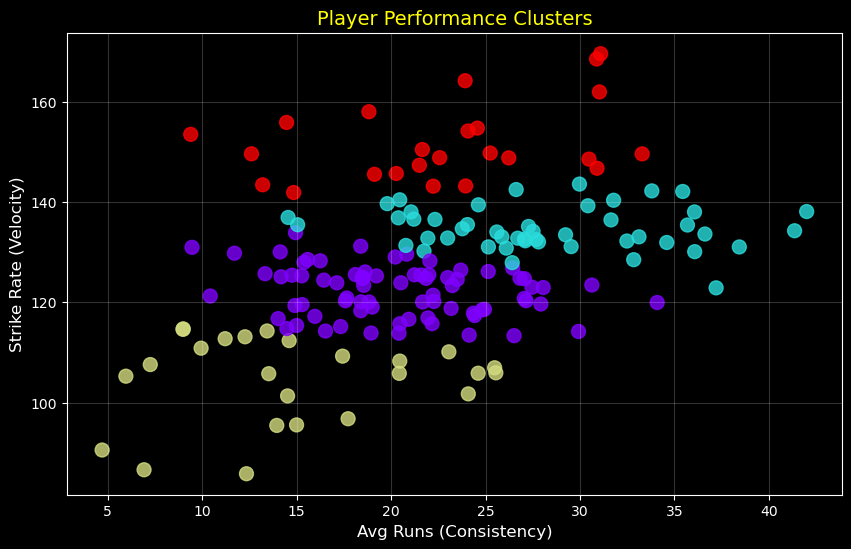

In [4]:
# Run pipeline
if engine.df is not None:
    engine.preprocess_data()
    engine.feature_engineering()
    engine.run_clustering()
    engine.visualize()